In [1]:
import numpy as np
import pandas as pd
ndf = pd.read_csv('labeled_data.csv')

In [2]:
ndf.isnull().sum()

Unnamed: 0            0
count                 0
hate_speech           0
offensive_language    0
neither               0
class                 0
tweet                 0
dtype: int64

In [3]:
ndf["labels"]= ndf["class"].map({0:"Hate Speech",1:"Offensive Language",2:"Neutral Language"})
df = ndf[["tweet","labels"]]
df

,tweet,labels
0,!!! RT @mayasolovely: As a woman you shouldn't...,Neutral Language
1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...,Offensive Language
2,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...,Offensive Language
3,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...,Offensive Language
4,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...,Offensive Language
...,...,...
24778,you's a muthaf***in lie &#8220;@LifeAsKing: @2...,Offensive Language
24779,"you've gone and broke the wrong heart baby, an...",Neutral Language
24780,young buck wanna eat!!.. dat nigguh like I ain...,Offensive Language
24781,youu got wild bitches tellin you lies,Offensive Language


In [4]:
import re
import nltk
# Download stopwords if not already present
nltk.download('stopwords')
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))
stemmer = nltk.SnowballStemmer('english')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\nitin\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [5]:
def clean_text(text: str) -> str:
    if not isinstance(text, str):
        return ""  # Return empty string for non-string values

    # 1. Convert to lowercase
    text = text.lower()

    # 2. Remove URLs (http/https links)
    text = re.sub(r'http\S+|www\S+|https\S+', '', text, flags=re.MULTILINE)

    # 3. Remove user mentions (@username)
    text = re.sub(r'@\w+', '', text)

    # 4. Remove hashtags (#hashtag) - keep the word if desired, but remove the '#'
    # This regex removes the entire hashtag including the '#'
    text = re.sub(r'#\w+', '', text)

    # 5. Remove punctuation and special characters (keep only letters and spaces)
    # This regex keeps alphanumeric characters and spaces, removing everything else
    text = re.sub(r'[^a-z\s]', '', text)

    # 6. Remove numbers (if not already removed by the above regex for non-alphanumeric)
    text = re.sub(r'\d+', '', text)

    # 7. Remove extra whitespace (leading, trailing, and multiple spaces between words)
    text = re.sub(r'\s+', ' ', text).strip()

    # 8. Remove stopwords
    # Split text into words, filter out stopwords, and join back
    words = text.split()
    filtered_words = [word for word in words if word not in stop_words]
    text = " ".join(filtered_words)

    return text

# Apply the cleaning function to the 'tweet' column
df['tweet'] = df['tweet'].apply(clean_text)

# Display the cleaned data (optional)
print(df.head())


                                               tweet              labels
0  rt woman shouldnt complain cleaning house amp ...    Neutral Language
1  rt boy dats coldtyga dwn bad cuffin dat hoe st...  Offensive Language
2  rt dawg rt ever fuck bitch start cry confused ...  Offensive Language
3                                rt look like tranny  Offensive Language
4  rt shit hear might true might faker bitch told ya  Offensive Language


C:\Users\nitin\AppData\Local\Temp\ipykernel_43072\1030573999.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['tweet'] = df['tweet'].apply(clean_text)


In [6]:
df

,tweet,labels
0,rt woman shouldnt complain cleaning house amp ...,Neutral Language
1,rt boy dats coldtyga dwn bad cuffin dat hoe st...,Offensive Language
2,rt dawg rt ever fuck bitch start cry confused ...,Offensive Language
3,rt look like tranny,Offensive Language
4,rt shit hear might true might faker bitch told ya,Offensive Language
...,...,...
24778,yous muthafin lie right tl trash mine bible sc...,Offensive Language
24779,youve gone broke wrong heart baby drove rednec...,Neutral Language
24780,young buck wanna eat dat nigguh like aint fuck...,Offensive Language
24781,youu got wild bitches tellin lies,Offensive Language


In [7]:
X= np.array(df['tweet'])
Y= np.array(df['labels'])

In [8]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
vectorizer = CountVectorizer()

In [9]:
X = vectorizer.fit_transform(X)

In [10]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [11]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()
model.fit(X_train, Y_train)
Y_pred = model.predict(X_test)

In [12]:
#confusion matrix and accuracy
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(Y_test, Y_pred)
accuracy = accuracy_score(Y_test, Y_pred)
cm

array([[  94,   32,  164],
       [  55,  699,   81],
       [ 191,  145, 3496]], dtype=int64)

<Axes: >

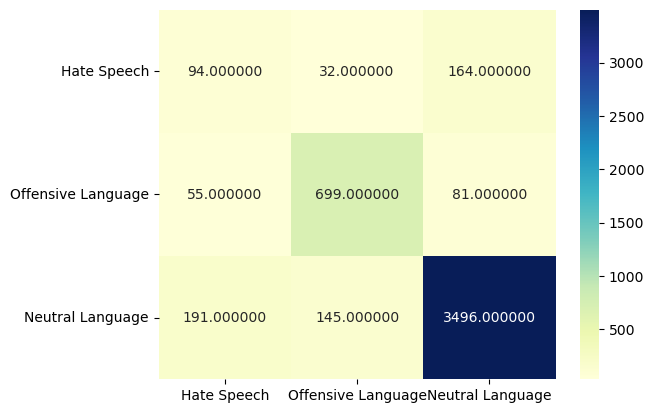

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.heatmap(cm, annot=True, fmt='f', cmap='YlGnBu', xticklabels=['Hate Speech', 'Offensive Language', 'Neutral Language'], 
            yticklabels=['Hate Speech', 'Offensive Language', 'Neutral Language'])

In [14]:
accuracy_score(Y_test, Y_pred)

0.8652410732297761

In [15]:
import pickle
pickle_model_path = 'model.pkl'
with open(pickle_model_path, 'wb') as f:
    pickle.dump(model, f)